# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_overview)
    * [Conclusions](#data_overview_conclusions)
* [Stage 2. Data preprocessing.](#data_preprocessing)
    * [2.6 Conclusions](#data_preprocessing_conclusions)
* [Stage 3 Boostraping and using Linear Regression.](#hypothesis)
    
   
* [Findings and Conclusions](#end)

### Introduction: 

I work for the OilyGiant mining company. Your task is to find the best place for a new well.


Steps to choose the location:

    Collect the oil well parameters in the selected region: oil quality and volume of reserves;
    Build a model for predicting the volume of reserves in the new wells;
    Pick the oil wells with the highest estimated values;
    Pick the region with the highest total profit for the selected oil wells.
    You have data on oil samples from three regions. Parameters of each oil well in the region are already known.  Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats as st
import seaborn as sb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#import the data
try:
    geo_0 = pd.read_csv('datasets/geo_data_0.csv') #read csv file stored locally on my laptop
except:
    geo_0 = pd.read_csv('/datasets/geo_data_0.csv') #make an exception for when I upload the project to Practicum
try:
    geo_1 = pd.read_csv('datasets/geo_data_1.csv') #read csv file stored locally on my laptop
except:
    geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
try:
    geo_2 = pd.read_csv('datasets/geo_data_2.csv') #read csv file stored locally on my laptop
except:
    geo_2 = pd.read_csv('/datasets/geo_data_2.csv')


Data in the tables:

    id — unique oil well identifier
    f0, f1, f2 — three features of points (their specific meaning is unimportant)
    product — volume of reserves in the oil well (thousand barrels).

In [3]:
geo_0.head() #quick look at the data in each table

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
geo_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
geo_0.info() #Checking for null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Everything looks ok with the data in the tables for the 3 different regions. 

Lets look at the distribution of each of target data in each region.

In [9]:
geo_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [10]:
geo_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
geo_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


We can see that the mean and the median for product in first and last regions is very close together. The region labeled geo_1 has a median a bit smaller than the mean so the distribution might not be normal we will have to look at the histograms.

<AxesSubplot:>

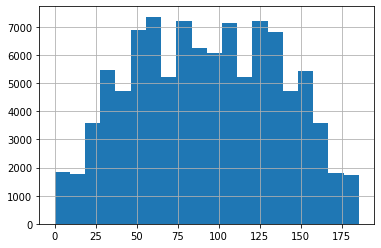

In [12]:
geo_0['product'].hist(bins=20)

<AxesSubplot:>

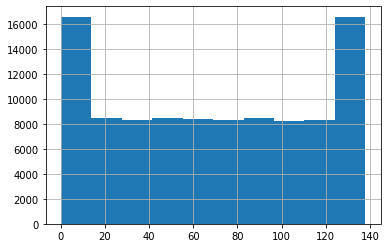

In [13]:
geo_1['product'].hist(bins=10)

<AxesSubplot:>

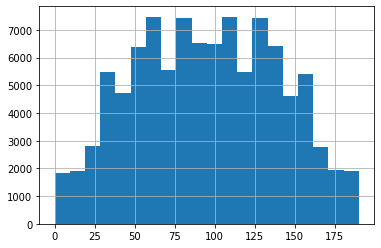

In [14]:
geo_2['product'].hist(bins=20)

Something looks strange about geo_1 histogram the product data does not look normally distributed. Lets look at a boxplot for geo_1. The other 2 regions geo_0 and geo_2 do look normally distributed. 

<AxesSubplot:>

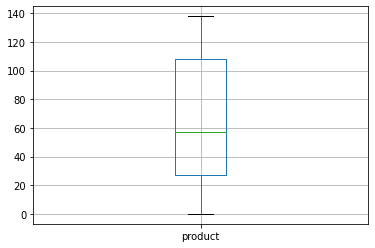

In [15]:
geo_1.boxplot(column = 'product')

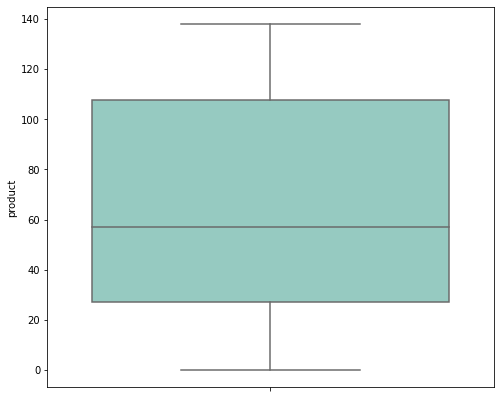

In [16]:
fig, ax =  plt.subplots(figsize=(8,7))
ax = sb.boxplot( y='product',data = geo_1, palette="Set3")

In [17]:
geo_1['product'].max()

137.94540774090564

It actually appears that all data falls between the top and bottom whiskers so there are not true outliers in geo_1 for the product column. 

In [18]:
geo_1['product'].min()

0.0

In [19]:
geo_0.query('product==0')

,id,f0,f1,f2,product
57263,zCM5W,-0.702064,0.375992,0.236572,0.0


In [20]:
geo_2.query('product==0')

,id,f0,f1,f2,product
68149,qeefd,-0.865596,-1.615247,-4.126441,0.0


In [21]:
geo_1.query('product==0').count()

id         8235
f0         8235
f1         8235
f2         8235
product    8235
dtype: int64

geo_1 has 8235 rows and ids that have a product of zero. These are wells we really don't want to find or predict because we want wells that make a profit so I will drop these rows. As a comparison the other 2 regions only have one well id equal to zero. 

In [22]:
geo_1.query('product<4 and product>=0 ' ).count()

id         16572
f0         16572
f1         16572
f2         16572
product    16572
dtype: int64

geo_1 region has  16572 of ids with less than 4,000 barrels of oil in reserves. These are not profitable to develop based on budget of 100 Million per 200 oil wells.

In [23]:
geo_0.query('product<4 and product>=0 ' ).count()

id         822
f0         822
f1         822
f2         822
product    822
dtype: int64

In [24]:
geo_2.query('product<4 and product>=0 ' ).count()

id         763
f0         763
f1         763
f2         763
product    763
dtype: int64

In [25]:
geo_1.sort_values('product',ascending=False ).head(5000)

,id,f0,f1,f2,product
53864,MzRzn,2.901352,-3.475398,5.001393,137.945408
97083,nW6eC,-4.030430,-14.020643,5.009571,137.945408
88340,xwJzQ,-3.373117,-9.227661,4.994369,137.945408
64879,Xd8DC,-5.360281,-2.388204,5.001439,137.945408
7288,Stdrb,-8.058661,-2.244840,5.000753,137.945408
...,...,...,...,...,...
27916,XMHOp,-2.431278,-0.696336,4.995988,137.945408
27920,G7Xyb,-6.418231,-5.094249,5.004449,137.945408
27928,KmcHn,-7.107418,-12.631927,5.002451,137.945408
2194,f0vwX,-3.256889,-10.452540,5.000511,137.945408


In geo_1 we also see a spike at exactly 137.945 barrels of product. The target data just seems strange for geo_1 with a spike less than 4000 barrels and a spike at 13 945 barrels on the other extreme of the histogram. 

### Lets build a regression model to try to predict product based on f0, f1, f2. 

In [26]:
#First we split the data into validation and training sets.

In [27]:
X_0 = geo_0.drop(['product','id'], axis = 1) #We drop the id since it is unique for eache row and this doesn't help the linear regression model
y_0 = geo_0['product']

In [28]:
X_0_train, X_0_val, y_0_train, y_0_val = train_test_split(X_0, y_0 , test_size=0.25, random_state=77)

In [29]:
X_1 = geo_1.drop(['product','id'], axis = 1)
y_1 = geo_1['product']

In [30]:
X_1_train, X_1_val, y_1_train, y_1_val = train_test_split(X_1, y_1 , test_size=0.25, random_state=77)

In [31]:
X_2 = geo_2.drop(['product','id'], axis = 1)
y_2 = geo_2['product']

In [32]:
X_2_train, X_2_val, y_2_train, y_2_val = train_test_split(X_2, y_2 , test_size=0.25, random_state=77)

In [33]:
model_0 = LinearRegression() 
model_0.fit(X_0_train, y_0_train) #train the model for region 0

LinearRegression()

In [34]:
model_1 = LinearRegression() 
model_1.fit(X_1_train, y_1_train) #train the model for region 1

LinearRegression()

In [35]:
model_2 = LinearRegression() 
model_2.fit(X_2_train, y_2_train) #train the model for region 1

LinearRegression()

In [36]:
model_0.score(X_0_val, y_0_val) # our model is not very good by this measure using coeficient of determination

0.2740505603096741

In [37]:
(model_0.predict(X_0_val)- y_0_val).std()

37.77299367518926

<AxesSubplot:>

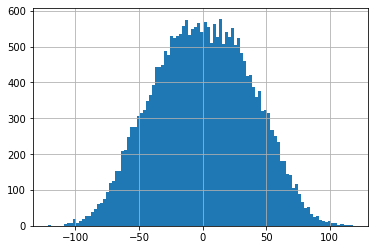

In [38]:
(model_0.predict(X_0_val)- y_0_val).hist(bins=100);

0.8889883610061976

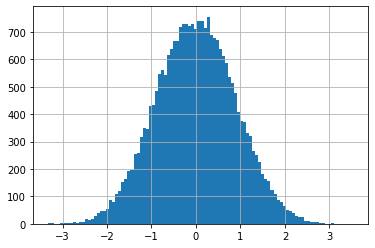

In [39]:
(model_1.predict(X_1_val)- y_1_val).hist(bins=100)
(model_1.predict(X_1_val)- y_1_val).std()

39.93112389828492

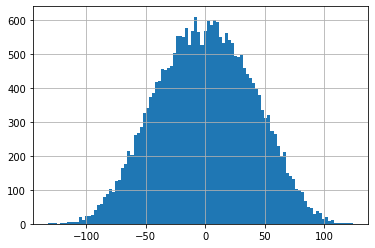

In [40]:
(model_2.predict(X_2_val)- y_2_val).hist(bins=100)
(model_2.predict(X_2_val)- y_2_val).std()

In [41]:
r0_vals = pd.DataFrame()
r0_vals['predicted'] = model_0.predict(X_0_val) #changed the fit to the validation test set.
r0_vals['actual'] = y_0_val.values

In [42]:
r0_vals.head()

,predicted,actual
0,75.950843,78.457075
1,97.225399,81.490366
2,128.650402,155.905578
3,110.968969,140.785031
4,114.644157,177.124963


In [43]:
r1_vals = pd.DataFrame()
r1_vals['predicted'] = model_1.predict(X_1_val)
r1_vals['actual'] = y_1_val.values

In [44]:
r2_vals = pd.DataFrame()
r2_vals['predicted'] = model_2.predict(X_2_val)
r2_vals['actual'] = y_2_val.values

### Calculate root mean squared error or RMSE. 

In [45]:
np.sqrt(mean_squared_error(r0_vals['predicted'],r0_vals['actual']))

37.772329071165224

In [46]:
np.sqrt(mean_squared_error(r1_vals['predicted'],r1_vals['actual']))

0.8889724316375048

In [47]:
np.sqrt(mean_squared_error(r2_vals['predicted'],r2_vals['actual']))

39.930553388010296

### Take a sample of 500 then select the top 200 and check profitability.

In [48]:
((r0_vals.sample(500).sort_values('predicted', ascending=False).iloc[0:200].sum()*4.5))-100000 #Divided everything by 1000 for simplicity

predicted    4797.733867
actual       6529.424067
dtype: float64

In [49]:
((r1_vals.sample(500).sort_values('predicted', ascending=False).iloc[0:200].sum()*4.5))-100000

predicted    3594.325739
actual       3635.495999
dtype: float64

In [50]:
((r2_vals.sample(500).sort_values('predicted', ascending=False).iloc[0:200].sum()*4.5))-100000

predicted    1349.285868
actual        100.090901
dtype: float64

If the budget to develop 200 wells is 100M then the budget to develop each well is 500,000 and that means for a well to be worth that investment it must have a product above 111 (since 111 X 4500) is about 500K.

## 3 Prepare for profit calculation:

3.1. Store all key values for calculations in separate variables.
3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
3.3. Provide the findings about the preparation for profit calculation step.

If the budget to develop 200 wells is 100M then the budget to develop each well is 500,000 and that means for a well to be worth that investment it must have a product above 111 (since 111 X 4500) is about 500K.

Minimum volume of reserves should be the equivalent 100,000,000/200 translated into barrels of oil. So 500,000/4500.

In [51]:
min_volume = (100000000/200)/4500 #This is the minimum oil volume need to not incure a loss at OilGiant.
print(min_volume) # This is just the break even point to make a profit there must be more than 111.111 in the product.

111.11111111111111


In [52]:
print('geo_0:',geo_0['product'].mean())
print('geo_1:',geo_1['product'].mean())
print('geo_2:',geo_2['product'].mean())

geo_0: 92.50000000000001
geo_1: 68.82500000000002
geo_2: 95.00000000000004


We can see that the mean for all 3 regions is less than the break even needed for the development budget to be worth the investment. We had also found that geo_1 had over 8500 wells with zero volume. I don't think these wells should even be included in the analysis since it would not make sense to invest in a well that does not have any oil. 

## 4 Write a function to calculate profit from a set of selected oil wells and model predictions:
4.1. Pick the wells with the highest values of predictions.
4.2. Summarize the target volume of reserves in accordance with these predictions
4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.
Calculate risks and profit for each region:

In [53]:
def profit(df): #function to calculate profit by sorting by predicted values but looking at actuals to calculate 200 best wells by predictions.
    top_200_pred = df.sort_values('predicted', ascending=False).head(200)
    profit = top_200_pred['actual'].sum()*4500 - 100000000 # We need to subtract the 100M needed to develop 200 wells
    ttl_predicted = sum(top_200_pred['predicted'])
    ttl_actual = sum(top_200_pred['actual'])
    mean_predicted = round(top_200_pred['predicted'].mean())
    mean_actual = round(top_200_pred['actual'].mean())
    return print('profit:', round(profit), 'ttl_predicted:', round(ttl_predicted), 'ttl_actual:', round(ttl_actual), 'mean_predicted:', mean_predicted, 'mean_actual:', mean_actual)

In [54]:
profit(r0_vals)

profit: 32617430 ttl_predicted: 30904 ttl_actual: 29471 mean_predicted: 155 mean_actual: 147


In [55]:
profit(r1_vals)

profit: 24150867 ttl_predicted: 27749 ttl_actual: 27589 mean_predicted: 139 mean_actual: 138


In [56]:
profit(r2_vals)

profit: 25258806 ttl_predicted: 29821 ttl_actual: 27835 mean_predicted: 149 mean_actual: 139


Region with highest profit for top 200 predicted well volume is region zero or geo_0 with almost 35 million in profit (for actual volumes) after subtracting the 100 million needed to develop 200 wells. It seems like of the 3 geo_0 is a clear winner by all metrics for both predictions and actuals. However, geo_1 does not have a normal distribution and is much closer to profits seen in geo_2 (does have a normal distribution. To break the close tie lets use boostrapping to get a better idea of total profitability with a high confidence level. 


## BOOSTRAPING

First we will look at region zero. We take 500 random samples than sort them and take top 200 by predicted volume for each. Then we calculate the profitability by subtracting the cost of developing 200 wells from the total profit. Once we have that we add that number to a list of 1000 profits from 1000 random subsamples with replacement. 

### Region 0 analysis of profitability

In [57]:
state = np.random.RandomState(77)


profit_values = []
for i in range(1000):
    profit = 0
    subsample = r0_vals.sample(n=500, replace=True, random_state=state) #Boostraping for region zero
    top_200_pred = subsample.sort_values('predicted', ascending=False).head(200)
    profit = top_200_pred['actual'].sum()*4500 - 100000000 # We need to subtract the 100M needed to develop 200 wells
    profit_values.append(profit)

profit_values = pd.Series(profit_values)

lower = profit_values.quantile(0.025).round(2) # We need 95% confidence
upper = profit_values.quantile(0.975).round(2)
print('With 95% confidence level profit will fall in this range:')
print('lower:', lower)
print('upper:', upper)

mean_profit = profit_values.mean()
negative_profit_chance = (profit_values < 0).mean()

print('mean_profit:', round(mean_profit,2))

print('negative_profit_chance:', negative_profit_chance*100, '%')

With 95% confidence level profit will fall in this range:
lower: -496905.97
upper: 9440370.57
mean_profit: 4484896.35
negative_profit_chance: 4.2 %


### Region 1 analysis of profitability

In [58]:
state = np.random.RandomState(77)


profit_values = []
for i in range(1000):
    profit = 0
    subsample = r1_vals.sample(n=500, replace=True, random_state=state) #Boostraping for region one
    top_200_pred = subsample.sort_values('predicted', ascending=False).head(200)
    profit = top_200_pred['actual'].sum()*4500 - 100000000 # We need to subtract the 100M needed to develop 200 wells
    profit_values.append(profit)

profit_values = pd.Series(profit_values)

lower = profit_values.quantile(0.025).round(2) # We need 95% confidence
upper = profit_values.quantile(0.975).round(2)
print('With 95% confidence level profit will fall in this range:')
print('lower:', lower)
print('upper:', upper)

mean_profit = profit_values.mean()
negative_profit_chance = (profit_values < 0).mean()

print('mean_profit:', round(mean_profit,2))

print('negative_profit_chance:', negative_profit_chance*100, '%')

With 95% confidence level profit will fall in this range:
lower: 1187652.67
upper: 8679638.12
mean_profit: 4881318.23
negative_profit_chance: 0.6 %


In [59]:
state = np.random.RandomState(77)


profit_values = []
for i in range(1000):
    profit = 0
    subsample = r1_vals.sample(n=500, replace=True, random_state=state) #Boostraping for region one
    top_200_pred = subsample.sort_values('predicted', ascending=False).head(200)
    profit = top_200_pred['actual'].sum()*4500 - 100000000 # We need to subtract the 100M needed to develop 200 wells
    profit_values.append(profit)

profit_values = pd.Series(profit_values)

lower = profit_values.quantile(0.0125).round(2) # Increasd to 97.5% confidence
upper = profit_values.quantile(0.9875).round(2)
print('With 97.5% confidence level profit will fall in this range:')
print('lower:', lower)
print('upper:', upper)

mean_profit = profit_values.mean()
negative_profit_chance = (profit_values < 0).mean()

print('mean_profit:', round(mean_profit,2))

print('negative_profit_chance:', negative_profit_chance*100, '%')

With 97.5% confidence level profit will fall in this range:
lower: 637635.09
upper: 9072251.24
mean_profit: 4881318.23
negative_profit_chance: 0.6 %


In [60]:
state = np.random.RandomState(77)


profit_values = []
for i in range(1000):
    profit = 0
    subsample = r1_vals.sample(n=1000, replace=True, random_state=state) #Boostraping for region one with sample of 1000
    top_200_pred = subsample.sort_values('predicted', ascending=False).head(200)
    profit = top_200_pred['actual'].sum()*4500 - 100000000 # We need to subtract the 100M needed to develop 200 wells
    profit_values.append(profit)

profit_values = pd.Series(profit_values)

lower = profit_values.quantile(0.0125).round(2) # Increasd to 97.5% confidence
upper = profit_values.quantile(0.9875).round(2)
print('With 97.5% confidence level profit will fall in this range:')
print('lower:', lower)
print('upper:', upper)

mean_profit = profit_values.mean()
negative_profit_chance = (profit_values < 0).mean()

print('mean_profit:', round(mean_profit,2))

print('negative_profit_chance:', negative_profit_chance*100, '%')

With 97.5% confidence level profit will fall in this range:
lower: 16075011.68
upper: 22360398.12
mean_profit: 19028654.73
negative_profit_chance: 0.0 %


### Region 2 analysis of profitability

In [61]:
state = np.random.RandomState(77)


profit_values = []
for i in range(1000):
    profit = 0
    subsample = r2_vals.sample(n=500, replace=True, random_state=state) #Boostraping for region two
    top_200_pred = subsample.sort_values('predicted', ascending=False).head(200)
    profit = top_200_pred['actual'].sum()*4500 - 100000000 # We need to subtract the 100M needed to develop 200 wells
    profit_values.append(profit)

profit_values = pd.Series(profit_values)

lower = profit_values.quantile(0.025).round(2) # We need 95% confidence
upper = profit_values.quantile(0.975).round(2)
print('With 95% confidence level profit will fall in this range:')
print('lower:', lower)
print('upper:', upper)

mean_profit = profit_values.mean()
negative_profit_chance = (profit_values < 0).mean()

print('mean_profit:', round(mean_profit,2))

print('negative_profit_chance:', round(negative_profit_chance, 3)*100, '%')

With 95% confidence level profit will fall in this range:
lower: -1512476.4
upper: 8980593.79
mean_profit: 3632383.3
negative_profit_chance: 8.799999999999999 %


### Conclusions: <a id='end'></a>

<div class="alert alert-info">
  
  
1. After using boostraping to get random samples from all 3 regions and looking at the profitability of each of these 1000 random samples we can see that region 1 or geo_1 is the best region to develop 200 random new wells. This is because when we look at the bottom quantile of 2.5% or .025 quantile both region 0 and region 2 (geo_0 and geo_2) both show a loss on the lower range so with 95% confidence our profit would fall between a loss and a profit of x. Region 1 is the only region that guarantees that when building out 200 top wells out of a random sample of 500 wells we can say with 95% confidence that the worst that could happen is that you make a 1,187,653 USD profit. 


2. The probability of having a loss for region 1 is the lowest at .6% which makes sense considering that for the lower boundary it is the only region that does not show a loss. Since the probability of a loss is so small I increased the confidence level to 97.5% as an experiment (see above) and even with that higher degree of confidence level we still have all profits and no loses from the upper to the lower range. The mean profit is also the highest for region 1.  With those odds I also would also feel confident to recommend this region for development to the management team. 

3. As an added experiment, I ran the boostraping loop (still 1000 iterations see code above) but I changed the sample from 500 wells to 1000 wells then I picked the top 200 wells by volume. When you do this the profits get substantially better. Region 1 is still the best but we can say with 97.5 confidence level that our profits will be between 16 and 22 Million usd with zero probability of a loss. I know this might be a bigger expense for OilyGiant upfront but I think it would be well worth the investment to sample or survey 1000 random wells (to verify our predictions) and then pick the top 200 rather than only sample or survey 500 wells than pick the top 200 based on our predictions. I did the same for the other regions (didn't include the code for region zero and 2 since it was not part of the project) but Region 1 still is much more profitable than the other 2 regions. 
    
</div>